# qBraid-SDK: Devices and Jobs

Install the qBraid SDK environment on Lab, and use the qBraid CLI to enable [Quantum Jobs](https://docs.qbraid.com/en/latest/lab/quantumjobs.html):

In [1]:
!qbraid jobs enable qbraid_sdk

Successfully enabled qBraid Quantum Jobs in the qbraid_sdk environment.
Every AWS + IBM job you run will now be submitted through the qBraid API, so no access keys/tokens are necessary. 

To disable, run: `qbraid jobs disable qbraid_sdk`


You can check that the `jobs` keyword next to the qBraid SDK environment is now green.

In [2]:
!qbraid envs list

# installed environments:
#
qsharp                         /opt/.qbraid/environments/qsharp_b54crn
default                  jobs  /opt/.qbraid/environments/qbraid_000000
qiskit                   jobs  /home/jovyan/.qbraid/environments/qiskit_9y9siy
amazon_braket            jobs  /home/jovyan/.qbraid/environments/aws_braket_kwx6dl
intel                          /opt/.qbraid/environments/intel_zr7hfq
qbraid_sdk               jobs  /home/jovyan/.qbraid/environments/qbraid_sdk_9j9sjy



It's important to import the qBraid SDK only *after* you have enabled quantum jobs.

In [3]:
import qbraid

qbraid.__version__

'0.3.0'

## Unified quantum device search

List all of the 20+ QPUs and on-demand simulators available through qBraid Quantum Jobs.

In [4]:
from qbraid import get_devices

In [5]:
get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Belem,ibm_q_belem,●
IBM,Ext. stabilizer simulator,ibm_q_simulator_extended_stabilizer,●
IBM,Jakarta,ibm_q_jakarta,●
IBM,Lagos,ibm_q_lagos,●
IBM,Lima,ibm_q_lima,●
IBM,MPS simulator,ibm_q_simulator_mps,●
IBM,Manila,ibm_q_manila,●


Filter your device search with many different advanced query options! 

For example, let's find all gate-based QPUs that use at least 7 qubits:

In [6]:
get_devices(
    filters={
        "paradigm": "gate-based",
        "type": "QPU",
        "numberQubits": {"$gte": 7},
    }
)

For more query examples, see [Unified Device Search](https://docs.qbraid.com/en/latest/sdk/devices.html#unified-device-search) in the user guide.

## Create quantum circuit

Create a quantum circuit using any of one the qBraid support program types:

In [7]:
from qbraid import QPROGRAM_TYPES

QPROGRAM_TYPES

['braket.circuits.circuit.Circuit',
 'cirq.circuits.circuit.Circuit',
 'qiskit.circuit.quantumcircuit.QuantumCircuit',
 'pyquil.quil.Program',
 'pytket._tket.circuit.Circuit']

In this example, we'll use a basic Cirq circuit:

In [8]:
import cirq

# circuit to generate a Bell State
cirq_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
cirq_circuit.append(cirq.H(q0))
cirq_circuit.append(cirq.CNOT(q0, q1))

# add measurement at the end
cirq_circuit.append(cirq.measure(q0, q1, key="result"))

print(cirq_circuit)

0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────


## Run circuit on any supported device

Copy the desired Device ID into the device wrapper function and you're on your way. Initialize quantum jobs and collect results on any device through the same simple and consistent protocols.

In [9]:
from qbraid import device_wrapper
from qbraid.devices.ibm import ibm_least_busy_qpu

In [10]:
aws_device_id = "aws_sv_sim"

qbraid_aws_device = device_wrapper(aws_device_id)
qbraid_aws_job = qbraid_aws_device.run(cirq_circuit, shots=1000)

qbraid_aws_job.status()

<JobStatus.COMPLETED: 6>

In [11]:
# ibm_device_id = ibm_least_busy_qpu()

qbraid_ibm_device = device_wrapper("ibm_q_lima")
qbraid_ibm_job = qbraid_ibm_device.run(cirq_circuit, shots=1000)

qbraid_ibm_job.status()

<JobStatus.QUEUED: 1>

## Monitor and manage your jobs from one location

In [12]:
from qbraid import get_jobs

In [13]:
get_jobs()

qBraid ID,Submitted,Status
ibmq_lima-ryanjh88-qjob-m21ic98f6jtq0b143koh,2023-04-22T00:47:12.028Z,COMPLETED
aws_sv_sim-ryanjh88-qjob-t218v9mjufxwq8o3t2la,2023-04-22T00:46:56.609Z,COMPLETED
ibmq_belem-ryanjh88-qjob-cg6vhbmligee047j6bcs,2023-04-22T00:43:26.771Z,QUEUED
aws_sv_sim-ryanjh88-qjob-6yka3id49t6fn9foc6n8,2023-04-21T21:42:40.373Z,COMPLETED
ibm_lagos-ryanjh88-qjob-cia5cq1289ikos1csbqh,2023-04-21T17:43:58.768Z,COMPLETED
aws_sv_sim-ryanjh88-qjob-wwq5mgl6sf3urlwcdlc5,2023-04-21T17:05:07.142Z,COMPLETED
aws_ionq-ryanjh88-qjob-i1s48byejts138pr2kh2,2023-04-21T16:06:10.651Z,QUEUED
aws_rigetti_aspen_m3-ryanjh88-qjob-9653lbs85ktilari6jup,2023-04-20T21:57:21.360Z,COMPLETED
aws_oqc_lucy-ryanjh88-qjob-cbdpsjemf954l3ks3j04,2023-04-20T21:57:13.084Z,COMPLETED
aws_sv_sim-ryanjh88-qjob-2v8uzmofusa8v65ashtn,2023-04-20T21:40:35.746Z,COMPLETED


In [14]:
aws_result = qbraid_aws_job.result()
ibm_result = qbraid_ibm_job.result()

## Easily compare results

In [15]:
aws_counts = aws_result.measurement_counts()
ibm_counts = ibm_result.measurement_counts()

print(qbraid_aws_device.id)
print(f"counts: {aws_counts}\n")

print(qbraid_ibm_device.id)
print(f"counts: {ibm_counts}\n")

aws_sv_sim
counts: {'11': 490, '00': 510}

ibm_q_lima
counts: {'00': 482, '01': 32, '10': 26, '11': 460}



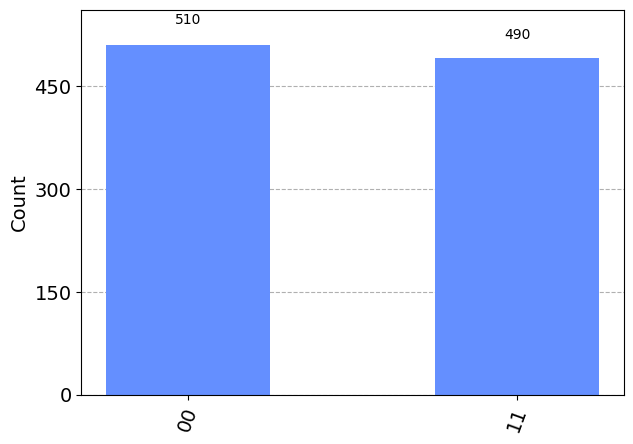

In [16]:
aws_result.plot_counts()

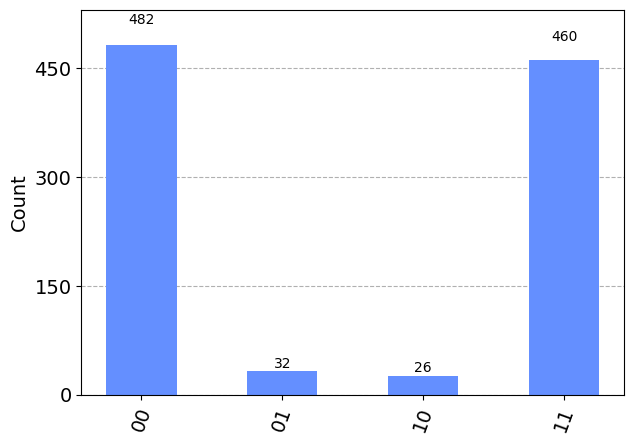

In [17]:
ibm_result.plot_counts()